In [55]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
!pip install --upgrade tables
!pip install --upgrade pydot_ng
!pip install --upgrade pydot
!pip install --upgrade pydotplus
!pip install --upgrade graphviz

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.4.4)
Requirement already up-to-date: pydot_ng in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pydot in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: pydotplus in /usr/local/lib/python3.6/dist-packages (2.0.2)
Requirement already up-to-date: graphviz in /usr/local/lib/python3.6/dist-packages (0.10.1)


In [0]:
import tensorflow as tf
#Libraries
from tensorflow.keras.models import Sequential

In [0]:
import matplotlib.pyplot as mapper_data_plotting_mat_display
#Libraries
import seaborn as sns
%matplotlib inline

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
#Libraries
import tensorflow.keras.backend as K

import math
from sklearn.preprocessing import RobustScaler
#Libraries
from collections import deque

In [0]:

from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
#Libraries
from tensorflow.keras.callbacks import TensorBoard

In [0]:
import pandas as pd
import numpy as np
#Libraries
import random

In [0]:
#Path here

base_path = '/content/drive/My Drive/stocks_project/'
sp500_path = '/content/drive/My Drive/stocks_project/data/sp/^GSPC.csv'
created_data_path = base_path + 'data/created/data500.h5'
created_data_path_new = base_path + 'data/created/data500_new.h5'
technical500_path = created_data_path + 'technical500.h5'
news_path = '/content/drive/My Drive/stocks_project/data/news/'

In [0]:
import pandas as pd

#Libraries
data = pd.read_hdf(created_data_path_new);

In [64]:

data['Y'] = data.lrets.shift(-1)
data.dropna(axis=0, inplace=True)
data.head()

,Adj Close,Volume,lrets,MACD,stochastics,ATR,neg,neu,pos,Y
1990-01-23,331.609985,179300000.0,0.003716,-1.021436,4.863502,4.089997,0.066,0.900,0.034,-0.004079
1990-01-24,330.260010,207830000.0,-0.004079,-1.103580,0.000000,7.539978,0.072,0.880,0.049,-0.012738
1990-01-25,326.079987,172270000.0,-0.012738,-1.323376,0.000000,7.000000,0.047,0.909,0.045,-0.000859
1990-01-26,325.799988,198190000.0,-0.000859,-1.419756,0.000000,7.139985,0.070,0.882,0.049,-0.001843
1990-01-29,325.200012,150770000.0,-0.001843,-1.447355,0.000000,5.519989,0.075,0.846,0.079,-0.006850


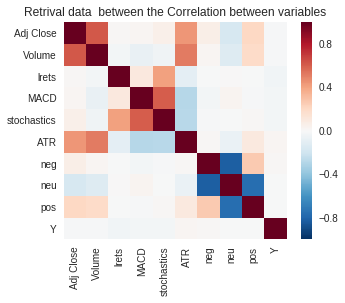

In [65]:
corr = data.corr()
#data mapper
f, ax = mapper_data_plotting_mat_display.subplots(figsize=(5, 4))
#data mapper
mapper_data_plotting_mat_display.title("Retrival data  between the Correlation between variables")
#data mapper
#heat-data mapper


#SP heatmapper
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [66]:
#create dequeue
d = deque('ghi')  
#create dequeue
#create dequeue
#create dequeue
for elem in d:                   
    print (elem.upper())

G
H
I


In [0]:
def preprocess_df(data, shuffle=True):
    mapped_data = data.copy()
    mapper_data_Sequence_of_dequeue_length = 60

    scaler = RobustScaler()
    data = scaler.fit_transform(data)

    sequential_data = []  
    mapper_data_run_retrival_days_array_fixer = deque(maxlen=mapper_data_Sequence_of_dequeue_length)  

    for i in data:  
        mapper_data_run_retrival_days_array_fixer.append([n for n in i[:-1]])  

        
        if len(mapper_data_run_retrival_days_array_fixer) == mapper_data_Sequence_of_dequeue_length:
            
            sequential_data.append([np.array(mapper_data_run_retrival_days_array_fixer), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  

    X = []
    y = []

    for seq, target in sequential_data:  
        X.append(seq)  
        y.append(target)  
    
    if shuffle == True:
        return np.array(X), y 
    else:
        return np.array(X), y, mapped_data, scaler

In [0]:
series_time_launch_dataretrival = sorted(data.index.values)
mapper_01_data_last_five_percentages = sorted(data.index.values)[-int(0.05*len(series_time_launch_dataretrival))]

mapper_data_validate_the_mainly_data_frames = data[(data.index >= mapper_01_data_last_five_percentages)]
mainely_done_data_frames_computed_python = data[(data.index < mapper_01_data_last_five_percentages)]



In [0]:
preprocessing_library_prescaled_compute = RobustScaler()
preprocessing_library_prescaled_compute = preprocessing_library_prescaled_compute.fit(mapper_data_validate_the_mainly_data_frames)

mapper_data_training_dataset_model, mapper_data_y_training_data_model = preprocess_df(mainely_done_data_frames_computed_python)
mapper_data_Input_value_X_taken, y_val, mapped_data, preprocessing_library_prescaled_compute = preprocess_df(mapper_data_validate_the_mainly_data_frames, shuffle=False)

In [0]:
class SGDRScheduler(Callback):
    
    def __init__(map_this_reference_to_selfer,
                 minimum_ration_computed_lr_taken,
                 maximum_ration_being_taken_lr_computed_done,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        map_this_reference_to_selfer.minimum_ration_computed_lr_taken = minimum_ration_computed_lr_taken
        map_this_reference_to_selfer.maximum_ration_being_taken_lr_computed_done = maximum_ration_being_taken_lr_computed_done
        map_this_reference_to_selfer.lr_decay = lr_decay

        map_this_reference_to_selfer.batch_since_restart = 0
        map_this_reference_to_selfer.next_restart = cycle_length

        map_this_reference_to_selfer.steps_per_epoch = steps_per_epoch

        map_this_reference_to_selfer.cycle_length = cycle_length
        map_this_reference_to_selfer.mult_factor = mult_factor

        map_this_reference_to_selfer.history = {}

    def clr(map_this_reference_to_selfer):
        
        fraction_to_restart = map_this_reference_to_selfer.batch_since_restart / (map_this_reference_to_selfer.steps_per_epoch * map_this_reference_to_selfer.cycle_length)
        lr = map_this_reference_to_selfer.minimum_ration_computed_lr_taken + 0.5 * (map_this_reference_to_selfer.maximum_ration_being_taken_lr_computed_done - map_this_reference_to_selfer.minimum_ration_computed_lr_taken) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(map_this_reference_to_selfer, logs={}):
        
        logs = logs or {}
        K.set_value(map_this_reference_to_selfer.model.optimizer.lr, map_this_reference_to_selfer.maximum_ration_being_taken_lr_computed_done)

    def on_batch_end(map_this_reference_to_selfer, batch, logs={}):
        
        logs = logs or {}
        map_this_reference_to_selfer.history.setdefault('lr', []).append(K.get_value(map_this_reference_to_selfer.model.optimizer.lr))
        for k, v in logs.items():
            map_this_reference_to_selfer.history.setdefault(k, []).append(v)

        map_this_reference_to_selfer.batch_since_restart += 1
        K.set_value(map_this_reference_to_selfer.model.optimizer.lr, map_this_reference_to_selfer.clr())

    def on_epoch_end(map_this_reference_to_selfer, epoch, logs={}):
        
        if epoch + 1 == map_this_reference_to_selfer.next_restart:
            map_this_reference_to_selfer.batch_since_restart = 0
            map_this_reference_to_selfer.cycle_length = np.ceil(map_this_reference_to_selfer.cycle_length * map_this_reference_to_selfer.mult_factor)
            map_this_reference_to_selfer.next_restart += map_this_reference_to_selfer.cycle_length
            map_this_reference_to_selfer.maximum_ration_being_taken_lr_computed_done *= map_this_reference_to_selfer.lr_decay
            map_this_reference_to_selfer.best_weights = map_this_reference_to_selfer.model.get_weights()

    def on_train_end(map_this_reference_to_selfer, logs={}):
       
        map_this_reference_to_selfer.model.set_weights(map_this_reference_to_selfer.best_weights)

In [0]:
class LRFinder(Callback):
    
    
    
    def __init__(map_this_reference_to_selfer, minimum_ration_computed_lr_taken=1e-5, maximum_ration_being_taken_lr_computed_done=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        map_this_reference_to_selfer.minimum_ration_computed_lr_taken = minimum_ration_computed_lr_taken
        map_this_reference_to_selfer.maximum_ration_being_taken_lr_computed_done = maximum_ration_being_taken_lr_computed_done
        map_this_reference_to_selfer.total_iterations = steps_per_epoch * epochs
        map_this_reference_to_selfer.iteration = 0
        map_this_reference_to_selfer.history = {}
        
    def clr(map_this_reference_to_selfer):
        
        x = map_this_reference_to_selfer.iteration / map_this_reference_to_selfer.total_iterations 
        return map_this_reference_to_selfer.minimum_ration_computed_lr_taken + (map_this_reference_to_selfer.maximum_ration_being_taken_lr_computed_done-map_this_reference_to_selfer.minimum_ration_computed_lr_taken) * x
        
    def on_train_begin(map_this_reference_to_selfer, logs=None):
        
        logs = logs or {}
        K.set_value(map_this_reference_to_selfer.model.optimizer.lr, map_this_reference_to_selfer.minimum_ration_computed_lr_taken)
        
    def on_batch_end(map_this_reference_to_selfer, epoch, logs=None):
        
        logs = logs or {}
        map_this_reference_to_selfer.iteration += 1

        map_this_reference_to_selfer.history.setdefault('lr', []).append(K.get_value(map_this_reference_to_selfer.model.optimizer.lr))
        map_this_reference_to_selfer.history.setdefault('iterations', []).append(map_this_reference_to_selfer.iteration)

        for k, v in logs.items():
            map_this_reference_to_selfer.history.setdefault(k, []).append(v)
            
        K.set_value(map_this_reference_to_selfer.model.optimizer.lr, map_this_reference_to_selfer.clr())
 
    def plot_lr(map_this_reference_to_selfer):
        
        mapper_data_plotting_mat_display.plot(map_this_reference_to_selfer.history['iterations'], map_this_reference_to_selfer.history['lr'])
        mapper_data_plotting_mat_display.yscale('log')
        mapper_data_plotting_mat_display.xlabel('Iteration')
        mapper_data_plotting_mat_display.ylabel('Learning rate')
        
    def plot_loss(map_this_reference_to_selfer):
        
        mapper_data_plotting_mat_display.plot(map_this_reference_to_selfer.history['lr'], map_this_reference_to_selfer.history['loss'])
        mapper_data_plotting_mat_display.xscale('log')
        mapper_data_plotting_mat_display.xlabel('Learning rate')
        mapper_data_plotting_mat_display.ylabel('Loss')

In [0]:
def build_model():
    
    #building the computed ata model step
    model = Sequential()
    #building the computed ata model step
    model.add(CuDNNLSTM(256, input_shape=(mapper_data_training_dataset_model.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  
    
    #building the computed ata model step
    model.add(CuDNNLSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    #building the computed ata model step
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    #building the computed ata model step
    model.add(BatchNormalization())
    #building the computed ata model step
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    #building the computed ata model step relu being used here
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    #building the computed ata model step
    
    opt = tf.keras.optimizers.RMSprop(lr=7e-3)
    #building the computed ata model step
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model

In [0]:
model = build_model()

Epoch 1/1
6113/6113 [==============================] - 17s 3ms/step - loss: 1.9177 - mean_squared_error: 1.9177


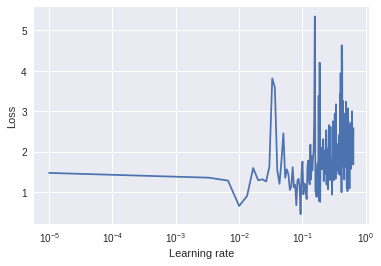

In [74]:

sizer_defined_hard = 20
sizer_batcher_size = 256

lr_finder = LRFinder(minimum_ration_computed_lr_taken=1e-5, 
                     maximum_ration_being_taken_lr_computed_done=1e-2, 
                     steps_per_epoch=np.ceil(sizer_defined_hard/sizer_batcher_size), 
                     epochs=3)
model.fit(mapper_data_training_dataset_model, mapper_data_y_training_data_model, callbacks=[lr_finder])

lr_finder.plot_loss()

In [75]:
model = build_model()
schedule = SGDRScheduler(minimum_ration_computed_lr_taken=1e-3,
                         maximum_ration_being_taken_lr_computed_done=1e-2,
                         steps_per_epoch=np.ceil(sizer_defined_hard/sizer_batcher_size),
                         lr_decay=0.9,
                         cycle_length= 3,
                         mult_factor=1.5)

model.fit(
    mapper_data_training_dataset_model,
    mapper_data_y_training_data_model,
    epochs=20, 
    callbacks=[schedule],
    validation_split=0.1,
    verbose=1)

Train on 5501 samples, validate on 612 samples
Epoch 1/20
5501/5501 [==============================] - 13s 2ms/step - loss: 1.4661 - mean_squared_error: 1.4661 - val_loss: 1.1955 - val_mean_squared_error: 1.1955
Epoch 2/20
5501/5501 [==============================] - 12s 2ms/step - loss: 1.2252 - mean_squared_error: 1.2252 - val_loss: 1.0528 - val_mean_squared_error: 1.0528
Epoch 3/20
5501/5501 [==============================] - 12s 2ms/step - loss: 1.1717 - mean_squared_error: 1.1717 - val_loss: 1.0528 - val_mean_squared_error: 1.0528
Epoch 4/20
5501/5501 [==============================] - 12s 2ms/step - loss: 1.1747 - mean_squared_error: 1.1747 - val_loss: 1.0700 - val_mean_squared_error: 1.0700
Epoch 5/20
5501/5501 [==============================] - 11s 2ms/step - loss: 1.1677 - mean_squared_error: 1.1677 - val_loss: 1.1566 - val_mean_squared_error: 1.1566
Epoch 6/20
5501/5501 [==============================] - 11s 2ms/step - loss: 1.1654 - mean_squared_error: 1.1654 - val_loss: 1.0

In [0]:
ResultComputedMetrics_train_scoring = model.evaluate(mapper_data_training_dataset_model, mapper_data_y_training_data_model, verbose=0)
print('Trained data computed results being told here RMSE: %2f' % math.sqrt(ResultComputedMetrics_train_scoring[0]))

resut_computed_TestScoreComputation = model.evaluate(mapper_data_Input_value_X_taken, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(resut_computed_TestScoreComputation[0]))

In [0]:
p = model.predict(mapper_data_Input_value_X_taken)

In [78]:
mapper_data_Input_value_X_taken.shape

(265, 60, 9)

In [79]:
p

array([[-0.43230003],
       [-0.3607918 ],
       [-0.09444748],
       [-0.07255035],
       [-0.10612463],
       [-0.2620936 ],
       [-0.06048271],
       [-0.09458357],
       [-0.38493133],
       [-0.08580937],
       [-0.08218805],
       [-0.07481058],
       [-0.05316917],
       [-0.06882042],
       [-0.04677216],
       [-0.09317245],
       [-0.08250403],
       [-0.25848517],
       [-0.2419703 ],
       [-0.1204444 ],
       [-0.08699619],
       [-0.15744965],
       [-0.34804562],
       [-0.06974937],
       [-0.1787412 ],
       [-0.25088271],
       [-0.34118372],
       [-0.3377924 ],
       [-0.22207741],
       [-0.1628159 ],
       [-0.11435072],
       [-0.10294465],
       [-0.15487288],
       [-0.07473364],
       [-0.12604837],
       [-0.11476155],
       [-0.08631164],
       [-0.04910314],
       [-0.08408048],
       [-0.0537451 ],
       [-0.09415251],
       [-0.08846454],
       [-0.08993834],
       [-0.11546826],
       [-0.09231476],
       [-0

In [80]:
p.shape

(265, 1)

In [81]:
data.shape

(6496, 10)

In [0]:
#padding = np.zeros((1249, 15))
#padding.shape

In [0]:
#pred_result = pd.DataFrame(data=padding)

In [0]:
#pred_result.shape

In [0]:
#pred_result.keys()

In [0]:
#pred_result.tail

In [0]:
#pred_result[14]

In [88]:
data.tail()

,Adj Close,Volume,lrets,MACD,stochastics,ATR,neg,neu,pos,Y
2018-10-03,2925.510010,3.598710e+09,0.000711,-1.724414,87.508948,18.500000,0.133,0.778,0.089,-0.008203
2018-10-04,2901.610107,3.496860e+09,-0.008203,-3.498974,30.536527,41.590088,0.085,0.832,0.083,-0.005543
2018-10-05,2885.570068,3.328980e+09,-0.005543,-5.951191,0.000000,40.349854,0.116,0.792,0.092,-0.000395
2018-10-08,2884.429932,3.330320e+09,-0.000395,-7.726477,0.000000,27.369873,0.095,0.808,0.097,-0.001419
2018-10-09,2880.340088,3.520500e+09,-0.001419,-9.170761,0.000000,20.560058,0.089,0.834,0.077,-0.033416


In [89]:
p.shape

(265, 1)

In [90]:
y_val

[0.42160153012322943,
 -0.013360737272669402,
 -0.32404249152682696,
 0.16865903776486527,
 0.10334862744280411,
 0.04561782272685021,
 -0.03387395468854142,
 -0.6499533199468297,
 -0.03162726639867636,
 -0.5118399767131062,
 -0.12783673888811195,
 0.5417371445360212,
 0.06138654893230689,
 0.4784424487292052,
 0.5065746745147952,
 0.2206635002745602,
 0.06841772546288231,
 0.8015776737777502,
 -0.3195092686777222,
 -0.4418741731470299,
 0.24795180481230314,
 0.1613700476124172,
 -0.4221635932850994,
 0.00685151189193033,
 0.15256535670453844,
 -0.02748598723613384,
 -0.015831030965340852,
 -0.08507064865192934,
 0.7134458837003307,
 -0.8054197128770189,
 0.1303912029614719,
 -0.9213821495092647,
 0.07246320531722343,
 1.204477534558223,
 -0.6745334725956973,
 0.017935312394565465,
 0.12608461811930485,
 -0.10814342438458965,
 0.3771244285385736,
 0.07251414477791808,
 -0.17152325562972368,
 0.10130074351463678,
 -0.7700715476281996,
 -0.29005482626842716,
 0.024479105938242166,
 -0.52

In [0]:
#SP-500:
padding = np.zeros((265, 9))
pred_result = pd.DataFrame(data=padding)
pred_result['9'] = p
pred = preprocessing_library_prescaled_compute.inverse_transform(pred_result)

validation_result_computation_01 = pd.DataFrame(data=padding)
validation_result_computation_01['9'] = y_val
val = preprocessing_library_prescaled_compute.inverse_transform(validation_result_computation_01)

In [0]:
pred = pred[:, -1]
val = val[:, -1]

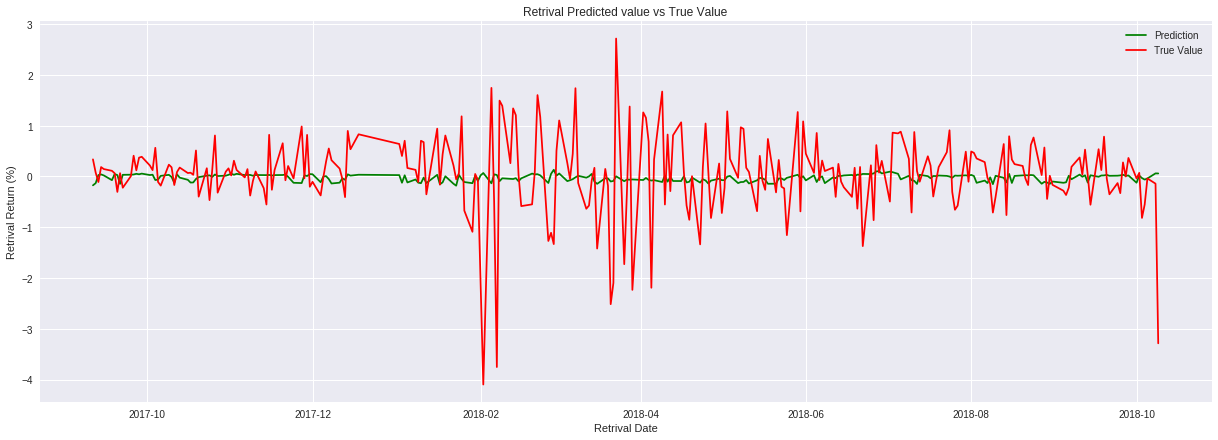

In [93]:
mapper_data_plotting_mat_display.figure(figsize=(21,7))
mapper_data_plotting_mat_display.plot(data.index[-len(pred):], np.expm1(pred)*100, color='green', label='Prediction')
mapper_data_plotting_mat_display.plot(data.index[-len(val):], np.expm1(val)*100, color='red', label='True Value')
mapper_data_plotting_mat_display.xlabel("Retrival Date")
mapper_data_plotting_mat_display.ylabel("Retrival Return (%)")
mapper_data_plotting_mat_display.title('Retrival Predicted value vs True Value')
mapper_data_plotting_mat_display.legend(loc='best')
mapper_data_plotting_mat_display.show()

((array([-2.79285789, -2.4926144 , -2.32228794, -2.20074297, -2.10500338,
         -2.02538542, -1.95685437, -1.89644383, -1.84225287, -1.79298727,
         -1.74772448, -1.70578274, -1.66664344, -1.62990245, -1.59523854,
         -1.56239191, -1.53114937, -1.50133371, -1.47279597, -1.44540967,
         -1.41906647, -1.39367282, -1.36914736, -1.34541887, -1.32242463,
         -1.30010909, -1.27842285, -1.25732173, -1.23676605, -1.21672008,
         -1.19715146, -1.17803083, -1.15933146, -1.14102891, -1.12310081,
         -1.10552661, -1.08828738, -1.07136565, -1.05474528, -1.03841126,
         -1.0223497 , -1.00654764, -0.99099301, -0.97567452, -0.96058162,
         -0.94570443, -0.93103367, -0.9165606 , -0.90227702, -0.8881752 ,
         -0.87424783, -0.860488  , -0.8468892 , -0.83344523, -0.82015025,
         -0.80699867, -0.79398521, -0.78110485, -0.76835279, -0.75572448,
         -0.74321554, -0.73082184, -0.71853938, -0.70636439, -0.69429321,
         -0.68232236, -0.67044849, -0.

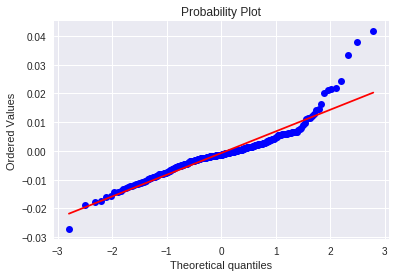

In [94]:
import scipy.stats as stats
defination_resiudal_compute = np.expm1(pred) - np.expm1(val)
stats.probplot(defination_resiudal_compute, dist="norm", plot=mapper_data_plotting_mat_display)